In [2]:
import pandas as pd
import numpy as np

In [3]:
START, STOP = '2013-07-01', '2013-07-31'


In [4]:
store = pd.HDFStore("/Users/nipunbatra/Downloads/wiki-temp.h5")

a = store.keys()
def num_from_key(key):
    return int(key[1:])

def key_from_num(num):
    return "/"+str(num)


ids = map(num_from_key, a)


from copy import deepcopy
cols_plus_data_id = deepcopy(cols)
cols_plus_data_id.insert(0, "dataid")


df = pd.read_csv("../../data/total/survey_2013.csv")

df = df[cols_plus_data_id].dropna()
survey_homes = df.dataid.values
data_homes = np.array(ids)


data_homes = np.array(ids)

ids_common = np.intersect1d(survey_homes, data_homes)


In [27]:
cols = ['dataid','programmable_thermostat_currently_programmed',
        'temp_summer_weekday_workday', 'temp_summer_weekday_morning',
        'temp_summer_weekday_evening', 'temp_summer_sleeping_hours_hours']

In [12]:
id_to_use = []
for id_home in ids_common[:]:
    try:
        
        d = store[key_from_num(id_home)]['air1'][START:STOP]
        if len(d) > 0:
            power = d
            mins_used = (power > 500).astype('int').resample("1H", how="sum")
            if mins_used.sum()>200:
                id_to_use.append(id_home)
    except Exception,e :
        print id_home
        print e
        
                

252
'air1'
1114
'air1'
2925
'air1'
2986
'air1'
3224
'air1'
3368
'air1'
4031
'air1'
5262
'air1'
5439
'air1'
5817
'air1'
6266
'air1'
8626
'air1'


In [28]:
df_res = df[df.dataid.isin(id_to_use)]

In [29]:
len(id_to_use)

65

In [30]:
df_res = df_res[cols]

In [31]:
df_res

,dataid,programmable_thermostat_currently_programmed,temp_summer_weekday_workday,temp_summer_weekday_morning,temp_summer_weekday_evening,temp_summer_sleeping_hours_hours
6,2242,Yes,76,73,73,73
8,5371,Yes,80,78,78,78
9,2557,Yes,78,78,78,78
13,7866,No,78,78,75,73
22,5746,Yes,77,77,77,75
35,410,Yes,84,80,80,76
38,1953,Yes,82,78,78,78
46,2953,Yes,79,79,79,82
58,624,Yes,85,85,80,78
64,9654,Yes,78,78,78,78


In [230]:
count = "count"
count_array = []
for index, row in df_res.iterrows():
    row[count] = 0
    if row["temp_summer_weekday_workday"]>=85:
        row[count]+=1
    elif row["temp_summer_weekday_workday"]>=78:
        row[count]+= (row["temp_summer_weekday_workday"]-78)/7.0
    if row["temp_summer_weekday_morning"]>=78:
        row[count]+=1
    if row["temp_summer_weekday_evening"]>=78:
        row[count]+=1
    if row["temp_summer_sleeping_hours_hours"]>=82:
        row[count]+=1
    count_array.append(row[count])
df_res["good_count"] = count_array

In [231]:
pd.value_counts(df_res.good_count.apply(lambda x: np.round(x)))

0    26
2    19
3    10
1     9
4     2
dtype: int64

In [232]:
overall_mins = []
overall_energy = []
morning_energy = []
work_energy = []
evening_energy = []
sleep_energy = []
morning_mins = []
work_mins = []
evening_mins = []
sleep_mins = []
for index, row in df_res.iterrows():
    power_df = store['/%d' %row.dataid]['air1'][START:STOP]
    mins = (power_df>500).sum()
    overall_mins.append(mins)
    overall_energy.append(power_df.sum())
    morning_energy.append(power_df.between_time("05:00", "10:00").sum())
    work_energy.append(power_df.between_time("10:01", "17:00").sum())
    evening_energy.append(power_df.between_time("17:01", "22:00").sum())
    sleep_energy.append(power_df.between_time("22:01", "05:00").sum())
    morning_mins.append((power_df.between_time("05:00", "10:00")>500).sum())
    work_mins.append((power_df.between_time("10:01", "17:00")>500).sum())
    evening_mins.append((power_df.between_time("17:01", "22:00")>500).sum())
    sleep_mins.append((power_df.between_time("22:01", "05:00")>500).sum())

In [233]:
df_res["overall_mins"] = overall_mins
df_res["overall_energy"] = overall_energy
df_res["morning_energy"] = morning_energy
df_res["work_energy"] = work_energy
df_res["sleep_energy"] = sleep_energy
df_res["evening_energy"] = evening_energy
df_res["morning_mins"] = morning_mins
df_res["evening_mins"] = evening_mins
df_res["sleep_mins"] = sleep_mins
df_res["work_mins"] = work_mins

In [247]:
df_res.head(10)

,dataid,programmable_thermostat_currently_programmed,temp_summer_weekday_workday,temp_summer_weekday_morning,temp_summer_weekday_evening,temp_summer_sleeping_hours_hours,good_count,overall_mins,overall_energy,morning_energy,work_energy,class,hvac_class,sleep_energy,evening_energy,morning_mins,evening_mins,sleep_mins,work_mins
6,2242,Yes,76,73,73,73,0.000000,24732,46563844,6391583,9423297,Bad,Bad,19036538,11745059,3620,5894,9881,5355
8,5371,Yes,80,78,78,78,2.285714,20662,35570824,5102189,5252180,Good,Average,15654020,9585470,3202,5230,8950,3294
9,2557,Yes,78,78,78,78,2.000000,6976,21272980,3739915,3616202,Good,Average,9223324,4711987,1309,1439,2980,1254
13,7866,No,78,78,75,73,1.000000,13009,29872980,6033660,4349129,Average,Bad,13837656,5670760,2758,2374,5886,2000
22,5746,Yes,77,77,77,75,0.000000,24692,41412548,6788647,6499324,Bad,Bad,15924400,12249270,4441,6775,9273,4234
35,410,Yes,84,80,80,76,2.857143,10549,30089832,7247779,2384123,Average,Average,14957245,5543071,2652,1848,5171,893
38,1953,Yes,82,78,78,78,2.571429,15662,35613096,6306440,4579052,Average,Average,18075172,6688052,3005,2726,7737,2210
46,2953,Yes,79,79,79,82,3.142857,10203,18110814,691607,4453247,Good,Good,6789789,6178455,424,3291,3749,2741
58,624,Yes,85,85,80,78,3.000000,16520,24485406,3740101,4573874,Good,Good,10138695,6047774,2702,3717,6482,3629
64,9654,Yes,78,78,78,78,2.000000,12122,25953082,3818675,3158027,Good,Average,13859422,5134606,1922,2281,6363,1565


In [235]:
def assign_class(x):
    if x<2:
        return "Bad"
    if x>=2 and x<3:
        return "Average"
    else:
        return "Good"
df_res["hvac_class"] = df_res.good_count.apply(assign_class)

In [236]:
pd.value_counts(df_res.hvac_class)

Bad        38
Average    23
Good        5
dtype: int64

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
from itertools import chain, combinations

def powerset(iterable):
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable( combinations(xs,n) for n in range(1, len(xs)+1))

In [237]:
features = ['work_energy', 'sleep_energy', 'morning_energy', 
            'evening_energy','morning_mins', 'work_mins','sleep_mins', 'evening_mins','overall_energy', 'overall_mins']

In [271]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [379]:
cls = {  "RF":RandomForestClassifier(random_state=1)
      }
out = {"SVM":{}, "DT":{},"KNN":{},"RF":{}, "Ada":{}}
best_feature = {"SVM":{}, "DT":{}}
best_accuracy = {"SVM":0, "DT":0}
for f in powerset(features):
    for cl_name, clf in cls.iteritems():
        clf.fit(df_res.head(33)[list(f)], df_res.head(33)["hvac_class"])
        y_pred = clf.predict(df_res.tail(33)[list(f)])
        y_true = df_res.tail(33)['hvac_class']
        out[cl_name][f] = accuracy_score(y_pred, y_true)
        
        
    

In [380]:
df_res.tail(33)['hvac_class'].value_counts()

Bad        18
Average    13
Good        2
dtype: int64

In [381]:
df_res.head(32)['hvac_class'].value_counts()

Bad        19
Average    10
Good        3
dtype: int64

In [382]:
out

{'Ada': {},
 'DT': {},
 'KNN': {},
 'RF': {('work_energy',
   'morning_energy',
   'evening_energy',
   'morning_mins',
   'work_mins',
   'sleep_mins',
   'evening_mins',
   'overall_mins'): 0.60606060606060608,
  ('work_energy',
   'morning_energy',
   'morning_mins',
   'sleep_mins',
   'overall_energy',
   'overall_mins'): 0.42424242424242425,
  ('evening_energy', 'overall_energy', 'overall_mins'): 0.51515151515151514,
  ('work_energy',
   'sleep_energy',
   'morning_energy',
   'overall_energy',
   'overall_mins'): 0.42424242424242425,
  ('work_energy',
   'sleep_energy',
   'morning_energy',
   'evening_energy',
   'work_mins',
   'sleep_mins',
   'evening_mins'): 0.54545454545454541,
  ('work_energy',
   'sleep_energy',
   'evening_energy',
   'morning_mins',
   'work_mins',
   'overall_mins'): 0.63636363636363635,
  ('sleep_energy',
   'morning_energy',
   'morning_mins',
   'work_mins',
   'evening_mins',
   'overall_mins'): 0.54545454545454541,
  ('sleep_energy',
   'morning_

In [383]:
import operator
sorted_x = sorted(out["RF"].items(), key=operator.itemgetter(1))


In [384]:
sorted_x[-1]

(('work_energy',
  'morning_energy',
  'evening_energy',
  'morning_mins',
  'work_mins',
  'evening_mins'),
 0.75757575757575757)

In [385]:
list(sorted_x[-1][0])

['work_energy',
 'morning_energy',
 'evening_energy',
 'morning_mins',
 'work_mins',
 'evening_mins']

In [392]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_res.head(33)[list(sorted_x[-1][0])], df_res.head(33)["hvac_class"])
pred_labels = clf.predict(df_res.tail(33)[list(sorted_x[-1][0])])
true_labels = df_res.tail(33)["hvac_class"]

In [393]:
pred_labels

array(['Average', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Average', 'Bad',
       'Bad', 'Average', 'Bad', 'Average', 'Bad', 'Bad', 'Bad', 'Average',
       'Average', 'Bad', 'Average', 'Average', 'Bad', 'Bad', 'Bad',
       'Average', 'Average', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Average',
       'Bad', 'Average'], dtype=object)

In [394]:
true_labels.values

array(['Average', 'Bad', 'Bad', 'Average', 'Average', 'Bad', 'Bad', 'Bad',
       'Average', 'Average', 'Bad', 'Average', 'Average', 'Bad', 'Bad',
       'Bad', 'Average', 'Bad', 'Average', 'Average', 'Bad', 'Bad', 'Bad',
       'Average', 'Average', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Average',
       'Bad', 'Good'], dtype=object)

In [395]:
df = pd.DataFrame({"pred":pred_labels, "true":true_labels.values})

In [396]:
accuracy_score(pred_labels, true_labels)

0.75757575757575757

In [409]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_res.head(33)[list(sorted_x[-1][0])], df_res.head(33)["hvac_class"])
pred_labels = clf.predict(df_res.tail(33)[list(sorted_x[-1][0])])
true_labels = df_res.tail(33)["hvac_class"]
df = pd.DataFrame({"pred":pred_labels, "true":true_labels.values})
accuracy_score(pred_labels, true_labels)
d1 = pd.DataFrame(confusion_matrix(true_labels, pred_labels))
d1.columns = ["Average", "Bad", "Good"]
d1.index = ["Average", "Bad", "Good"]
d1

,Average,Bad,Good
Average,9,4,0
Bad,2,16,0
Good,1,1,0


In [410]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_res.tail(33)[list(sorted_x[-1][0])], df_res.tail(33)["hvac_class"])
pred_labels = clf.predict(df_res.head(33)[list(sorted_x[-1][0])])
true_labels = df_res.head(33)["hvac_class"]
df = pd.DataFrame({"pred":pred_labels, "true":true_labels.values})
accuracy_score(pred_labels, true_labels)
d2 = pd.DataFrame(confusion_matrix(true_labels, pred_labels))
d2.columns = ["Average", "Bad", "Good"]
d2.index = ["Average", "Bad", "Good"]
d2

,Average,Bad,Good
Average,5,5,0
Bad,7,13,0
Good,2,1,0


In [411]:
d1+d2

,Average,Bad,Good
Average,14,9,0
Bad,9,29,0
Good,3,2,0


In [412]:
43.0/66

0.6515151515151515

In [138]:
clf.fit(df_res.head(32)[['work_energy', 'sleep_energy', 'morning_energy', 'evening_energy']], df_res.head(32)["hvac_class"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [139]:
o = clf.predict(df_res.tail(33)[['work_energy', 'sleep_energy', 'morning_energy', 'evening_energy']])

In [140]:
o

array(['Good', 'Bad', 'Average', 'Good', 'Bad', 'Good', 'Average', 'Good',
       'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Average', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Average', 'Bad', 'Bad', 'Bad', 'Good'], dtype=object)

In [157]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score

In [142]:
y_true = df_res.tail(33)["hvac_class"]
y_pred = o

In [145]:
precision_score(y_true, y_pred)

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.48124098124098119

In [143]:
confusion_matrix(y_true, y_pred)

array([[ 1,  2,  5],
       [ 2, 10,  4],
       [ 1,  3,  5]])

In [49]:
svr = LinearSVR()

In [83]:
svr.fit(df_res[['overall_mins', 'overall_energy', 'work_energy']], df_res['good_count'])

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [84]:
o=svr.predict(df_res[['overall_mins', 'overall_energy', 'work_energy']])

In [85]:
np.round(o)

array([ 102.,   77.,   46.,   65.,   90.,   64.,   77.,   40.,   53.,
         56.,   81.,  114.,   80.,   60.,  113.,   74.,   49.,   94.,
         21.,  107.,   85.,  153.,   16.,   56.,   71.,  110.,  110.,
         83.,   65.,   96.,   64.,   64.,   34.,   36.,  105.,  225.,
         48.,   86.,   30.,   84.,   35.,   98.,   65.,   54.,   41.,
         58.,   57.,   16.,   43.,   75.,   55.,   39.,   50.,  156.,
         66.,  123.,   44.,   89.,    4.,   22.,  153.,  176.,   97.,
        166.,   93.,   33.])

In [56]:
import matplotlib.pyplot as plt

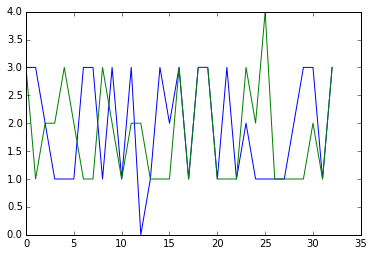

In [99]:
plt.plot(np.round(o))
plt.plot(df_res.tail(33)['good_count'])

In [58]:
%matplotlib inline

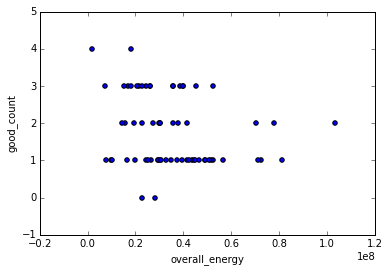

In [64]:
df_res.plot(kind="scatter", x="overall_energy", y="good_count")